In [0]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from keras.optimizers import SGD

In [250]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
df=pd.read_csv("/gdrive/My Drive/Churn.csv")

In [252]:
df.shape

(10000, 14)

In [253]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [254]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [0]:
# Dropping the columns which are unique for all users
df.drop(["RowNumber","CustomerId"],axis=1,inplace=True)

In [0]:
# Also Dropping the column: "Surname" as it looks like this column won't play a major role in 
# determining whether the customer will exit the bank or not
df.drop(["Surname"],axis=1,inplace=True)

In [257]:
df.shape

(10000, 11)

In [0]:
#Doing Label Encoding for Gender Column
encoder=preprocessing.LabelEncoder()
df["Gender"]=encoder.fit_transform(df['Gender'].values)
df["Gender"]=df["Gender"].astype(int)

In [0]:
#Doing one hot encoding for Geography Column
df_dummies=pd.get_dummies(df["Geography"])

In [0]:
df=pd.concat([df,df_dummies],axis=1)

In [0]:
#Dropping Column:Geography as there is no need of this column after one hot encoding
df.drop(["Geography"],axis=1,inplace=True)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
France             10000 non-null uint8
Germany            10000 non-null uint8
Spain              10000 non-null uint8
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [263]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [264]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

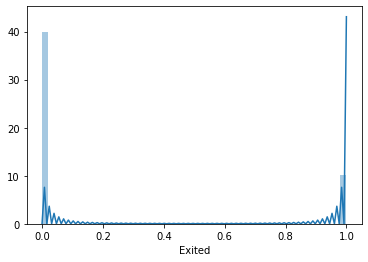

In [265]:
plt.figure()
sns.distplot(df["Exited"])

In [0]:
# Building the Features
features=df.drop(["Exited"],axis=1)

In [0]:
#Buiding the Target
target=df["Exited"]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25)

In [0]:
#Handling Class Imbalance
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

In [0]:
X_train_res_normalized=preprocessing.StandardScaler().fit_transform(X_train_res)

In [0]:
X_test_normalized=preprocessing.StandardScaler().fit_transform(X_test)

In [272]:
X_train_res_normalized.shape

(12014, 12)

In [0]:
#Building First Model
model1 = tf.keras.models.Sequential()

In [0]:
model1.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))

In [0]:
#Doing Normalization at each hidden layer
model1.add(tf.keras.layers.BatchNormalization())

In [0]:
#First Hidden Layer in DNN
model1.add(tf.keras.layers.Dense(200,activation="relu"))

In [0]:
#Second Hidden Layer in DNN
model1.add(tf.keras.layers.Dense(100,activation="relu"))

In [0]:
#Prediction Layer
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
#Compile Model
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [288]:
#Train Model
model1.fit(X_train_res_normalized, y_train_res, 
          validation_data=(X_test_normalized, y_test), 
          epochs=100,
          batch_size=50)

Train on 12014 samples, validate on 2500 samples
Epoch 1/100
12014/12014 [==============================] - 1s 51us/sample - loss: 0.2933 - acc: 0.8732 - val_loss: 0.4690 - val_acc: 0.7824
Epoch 2/100
12014/12014 [==============================] - 1s 50us/sample - loss: 0.2939 - acc: 0.8732 - val_loss: 0.5987 - val_acc: 0.7200
Epoch 3/100
12014/12014 [==============================] - 1s 51us/sample - loss: 0.2904 - acc: 0.8774 - val_loss: 0.5680 - val_acc: 0.7284
Epoch 4/100
12014/12014 [==============================] - 1s 51us/sample - loss: 0.2939 - acc: 0.8731 - val_loss: 0.5608 - val_acc: 0.7596
Epoch 5/100
12014/12014 [==============================] - 1s 48us/sample - loss: 0.2887 - acc: 0.8721 - val_loss: 0.4332 - val_acc: 0.8044
Epoch 6/100
12014/12014 [==============================] - 1s 50us/sample - loss: 0.2893 - acc: 0.8751 - val_loss: 0.4059 - val_acc: 0.8188
Epoch 7/100
12014/12014 [==============================] - 1s 49us/sample - loss: 0.2878 - acc: 0.8746 - val_lo

In [0]:
y_predict_model1=model1.predict(X_test_normalized)

In [0]:
threshold=0.5

In [0]:
y_predict_model1[y_predict_model1 >= threshold] = 1
y_predict_model1[y_predict_model1 < threshold] = 0


In [292]:
y_predict_model1

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
model1_confusion_matrix=confusion_matrix(y_test,y_predict_model1)

In [294]:
model1_confusion_matrix

array([[1583,  373],
       [ 164,  380]])

In [295]:
print(classification_report(y_test,y_predict_model1))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1956
           1       0.50      0.70      0.59       544

    accuracy                           0.79      2500
   macro avg       0.71      0.75      0.72      2500
weighted avg       0.82      0.79      0.80      2500



Observation:

As shown by the confusion matrix:

False Negative is 181: Means 181 people actually won't leave the bank but model predicted that they will leave the bank

False Positive us 214: Means 214 people will actually leave the bank but model predicted that they wont leave the bank

Both False Negative and False Positive are very high for this model

So definitely model needs to be optimized

In [0]:
# Optimizing the Model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(100,activation="relu"))
model2.add(tf.keras.layers.Dense(150,activation="relu"))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.01,nesterov=True),loss='binary_crossentropy', metrics=['accuracy'])

In [298]:
model2.fit(X_train_res_normalized, y_train_res, 
          validation_data=(X_test_normalized, y_test), 
          epochs=100,
          batch_size=50)

Train on 12014 samples, validate on 2500 samples
Epoch 1/100
12014/12014 [==============================] - 1s 113us/sample - loss: 0.6516 - acc: 0.6290 - val_loss: 0.6177 - val_acc: 0.6980
Epoch 2/100
12014/12014 [==============================] - 1s 48us/sample - loss: 0.5853 - acc: 0.7110 - val_loss: 0.6202 - val_acc: 0.6720
Epoch 3/100
12014/12014 [==============================] - 1s 46us/sample - loss: 0.5548 - acc: 0.7301 - val_loss: 0.6159 - val_acc: 0.6776
Epoch 4/100
12014/12014 [==============================] - 1s 49us/sample - loss: 0.5397 - acc: 0.7362 - val_loss: 0.6147 - val_acc: 0.6748
Epoch 5/100
12014/12014 [==============================] - 1s 48us/sample - loss: 0.5275 - acc: 0.7438 - val_loss: 0.6047 - val_acc: 0.6828
Epoch 6/100
12014/12014 [==============================] - 1s 48us/sample - loss: 0.5151 - acc: 0.7523 - val_loss: 0.5975 - val_acc: 0.6820
Epoch 7/100
12014/12014 [==============================] - 1s 47us/sample - loss: 0.5044 - acc: 0.7570 - val_l

In [300]:
y_predict_model2=model2.predict(X_test_normalized)
y_predict_model2[y_predict_model2 >= threshold] = 1
y_predict_model2[y_predict_model2 < threshold] = 0
model2_confusion_matrix=confusion_matrix(y_test,y_predict_model2)
model2_confusion_matrix

array([[1413,  543],
       [ 118,  426]])

In [301]:
print(classification_report(y_test,y_predict_model2))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1956
           1       0.44      0.78      0.56       544

    accuracy                           0.74      2500
   macro avg       0.68      0.75      0.69      2500
weighted avg       0.82      0.74      0.76      2500



In [302]:
#Creating a new model for better optimization
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(50,activation="relu"))
model3.add(tf.keras.layers.Dense(100,activation="relu"))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01, decay=1e-6),loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train_res_normalized, y_train_res, 
          validation_data=(X_test_normalized, y_test), 
          epochs=100,
          batch_size=50)

Train on 12014 samples, validate on 2500 samples
Epoch 1/100
12014/12014 [==============================] - 2s 131us/sample - loss: 0.4875 - acc: 0.7626 - val_loss: 0.3992 - val_acc: 0.8184
Epoch 2/100
12014/12014 [==============================] - 1s 64us/sample - loss: 0.4320 - acc: 0.8041 - val_loss: 0.4390 - val_acc: 0.7984
Epoch 3/100
12014/12014 [==============================] - 1s 61us/sample - loss: 0.3968 - acc: 0.8206 - val_loss: 0.4680 - val_acc: 0.7860
Epoch 4/100
12014/12014 [==============================] - 1s 61us/sample - loss: 0.3952 - acc: 0.8218 - val_loss: 0.4525 - val_acc: 0.7928
Epoch 5/100
12014/12014 [==============================] - 1s 59us/sample - loss: 0.3850 - acc: 0.8307 - val_loss: 0.4772 - val_acc: 0.7780
Epoch 6/100
12014/12014 [==============================] - 1s 58us/sample - loss: 0.3647 - acc: 0.8385 - val_loss: 0.4126 - val_acc: 0.8112
Epoch 7/100
12014/12014 [==============================] - 1s 64us/sample - loss: 0.3642 - acc: 0.8395 - val_l

In [303]:
y_predict_model3=model3.predict(X_test_normalized)
y_predict_model3[y_predict_model3 >= threshold] = 1
y_predict_model3[y_predict_model3 < threshold] = 0
model3_confusion_matrix=confusion_matrix(y_test,y_predict_model3)
model3_confusion_matrix

array([[1632,  324],
       [ 192,  352]])

In [304]:
print(classification_report(y_test,y_predict_model3))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1956
           1       0.52      0.65      0.58       544

    accuracy                           0.79      2500
   macro avg       0.71      0.74      0.72      2500
weighted avg       0.81      0.79      0.80      2500



In [0]:
# Trying classical algorithm to improve the accuracy

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [313]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train_res_normalized,y_train_res)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test_normalized)


In [315]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.2204
